In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

In [39]:
# set file location
from pathlib import Path
file_loc = Path("C:/Users/chaha/OneDrive/Documents/GMU/repositories/data_files/titanic (1).csv")
print("file location exists:", file_loc.is_dir())

file location exists: False


In [ ]:
# import dataset 

df = pd.read_csv(file_loc)
print(df)

In [27]:
# find out number of rows and columns

df.shape

(891, 16)

In [28]:
# find null values

nulls = df.isnull()
print("These are the features with null values, and the count of null values in each.")
nulls[nulls > 0]

These are the features with null values, and the count of null values in each.


,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Impute missing 'age' values based on another ('who') column, and check

category_means = df.groupby('who')['age'].transform('mean')
df1 = df.copy()
df1['age'].fillna(category_means, inplace=True)
df1[df1['who'] == 'child'].describe()
child_stats = df1[df1['who'] == 'child'].describe()
print(child_stats)

       Unnamed: 0   survived     pclass        age      sibsp      parch  \
count   83.000000  83.000000  83.000000  83.000000  83.000000  83.000000   
mean   430.602410   0.590361   2.626506   6.369518   1.734940   1.265060   
std    287.079319   0.494757   0.619024   4.729063   1.638592   0.682255   
min      7.000000   0.000000   1.000000   0.420000   0.000000   0.000000   
25%    171.500000   0.000000   2.000000   2.000000   0.000000   1.000000   
50%    435.000000   1.000000   3.000000   5.000000   1.000000   1.000000   
75%    705.500000   1.000000   3.000000   9.500000   3.000000   2.000000   
max    875.000000   1.000000   3.000000  15.000000   5.000000   2.000000   

             fare  
count   83.000000  
mean    32.785795  
std     33.466438  
min      7.225000  
25%     15.900000  
50%     26.250000  
75%     32.193750  
max    211.337500  


In [30]:
# try a quick association rule to see if there is some pattern to deck = NaN
# first we create a categories dataframe
columns_to_drop = ['pclass', 'sibsp', 'parch', 'Unnamed: 0', 'embarked', 'sex', 'age', 'fare', 'alive', 'adult_male']

df_categories = df1.drop(columns_to_drop, axis=1)
print(df_categories)

     survived   class    who deck  embark_town  alone
0           0   Third    man  NaN  Southampton  False
1           1   First  woman    C    Cherbourg  False
2           1   Third  woman  NaN  Southampton   True
3           1   First  woman    C  Southampton  False
4           0   Third    man  NaN  Southampton   True
..        ...     ...    ...  ...          ...    ...
886         0  Second    man  NaN  Southampton   True
887         1   First  woman    B  Southampton   True
888         0   Third  woman  NaN  Southampton  False
889         1   First    man    C    Cherbourg   True
890         0   Third    man  NaN   Queenstown   True

[891 rows x 6 columns]


In [31]:
# then we encode the category columns
columns_to_encode = ['class', 'who', 'deck', 'embark_town']
codes = cat_encoder.fit_transform(df_categories[columns_to_encode])
names = cat_encoder.get_feature_names_out()
encoded_df = pd.DataFrame(codes.todense(), columns = names)
encoded_df

,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
# then we clean things up a bit

df2 = pd.merge(encoded_df, df_categories[['survived', 'alone']], left_index=True, right_index=True)
df2['alone'] = df2['alone'].replace([True, False], [1, 0])
print(df2)

     class_First  class_Second  class_Third  who_child  who_man  who_woman  \
0            0.0           0.0          1.0        0.0      1.0        0.0   
1            1.0           0.0          0.0        0.0      0.0        1.0   
2            0.0           0.0          1.0        0.0      0.0        1.0   
3            1.0           0.0          0.0        0.0      0.0        1.0   
4            0.0           0.0          1.0        0.0      1.0        0.0   
..           ...           ...          ...        ...      ...        ...   
886          0.0           1.0          0.0        0.0      1.0        0.0   
887          1.0           0.0          0.0        0.0      0.0        1.0   
888          0.0           0.0          1.0        0.0      0.0        1.0   
889          1.0           0.0          0.0        0.0      1.0        0.0   
890          0.0           0.0          1.0        0.0      1.0        0.0   

     deck_A  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  de

In [33]:
# then we do some association rule mining using apriori and print the results
from mlxtend.frequent_patterns import apriori

results = apriori(df2, min_support=0.2)

results = results[results['itemsets'].apply(lambda x: len(x)) > 2]

results = results[results['itemsets'].apply(lambda x: 'deck_nan' in x)]

print(results)

Empty DataFrame
Columns: [support, itemsets]
Index: []


C:\Users\chaha\OneDrive\Documents\anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [34]:
# let's look at a subset of the data we suspect is most closely related to deck = NaN
# we want to filter to: who = man, embark town = southampton, alone = true and class_third = true
# we want the resulting table to just show the counts of each variable after filtering

df2[df2['who_man'] == True].sum()

class_First                119.0
class_Second                99.0
class_Third                319.0
who_child                    0.0
who_man                    537.0
who_woman                    0.0
deck_A                      13.0
deck_B                      19.0
deck_C                      31.0
deck_D                      15.0
deck_E                      16.0
deck_F                       5.0
deck_G                       0.0
deck_nan                   438.0
embark_town_Cherbourg       90.0
embark_town_Queenstown      37.0
embark_town_Southampton    410.0
embark_town_nan              0.0
survived                    88.0
alone                      410.0
dtype: float64

In [35]:
# join df1 and df2 for analysis like clustering, correlation, and pca
df3 = pd.concat([df1, df2], axis=1)
print(df3)

     Unnamed: 0  survived  pclass     sex   age  sibsp  parch     fare  \
0             0         0       3    male  22.0      1      0   7.2500   
1             1         1       1  female  38.0      1      0  71.2833   
2             2         1       3  female  26.0      0      0   7.9250   
3             3         1       1  female  35.0      1      0  53.1000   
4             4         0       3    male  35.0      0      0   8.0500   
..          ...       ...     ...     ...   ...    ...    ...      ...   
886         886         0       2    male  27.0      0      0  13.0000   
887         887         1       1  female  19.0      0      0  30.0000   
888         888         0       3  female  32.0      1      2  23.4500   
889         889         1       1    male  26.0      0      0  30.0000   
890         890         0       3    male  32.0      0      0   7.7500   

    embarked   class  ... deck_E  deck_F deck_G deck_nan  \
0          S   Third  ...    0.0     0.0    0.0    

In [36]:
# normalize age and fare, so they don't bias our clustering and correlation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3['age'] = scaler.fit_transform(df3[['age']])
df3['fare'] = scaler.fit_transform(df3[['fare']])
print(df3)

     Unnamed: 0  survived  pclass     sex       age  sibsp  parch      fare  \
0             0         0       3    male  0.271174      1      0  0.014151   
1             1         1       1  female  0.472229      1      0  0.139136   
2             2         1       3  female  0.321438      0      0  0.015469   
3             3         1       1  female  0.434531      1      0  0.103644   
4             4         0       3    male  0.434531      0      0  0.015713   
..          ...       ...     ...     ...       ...    ...    ...       ...   
886         886         0       2    male  0.334004      0      0  0.025374   
887         887         1       1  female  0.233476      0      0  0.058556   
888         888         0       3  female  0.396833      1      2  0.045771   
889         889         1       1    male  0.321438      0      0  0.058556   
890         890         0       3    male  0.396833      0      0  0.015127   

    embarked   class  ... deck_E  deck_F deck_G dec

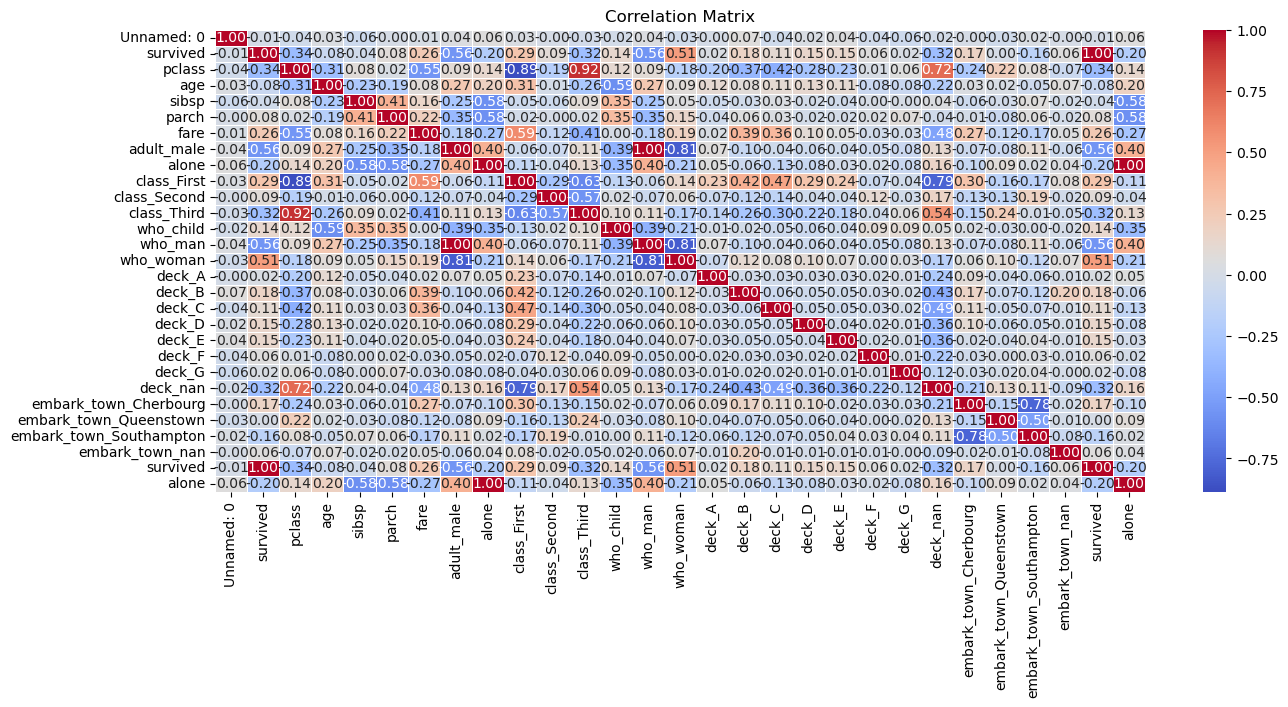

In [37]:
# discover correlations 

corr_matrix = df3.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()